In [ ]:
pip install opencv-python

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from PIL import Image
import os

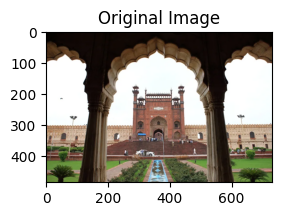

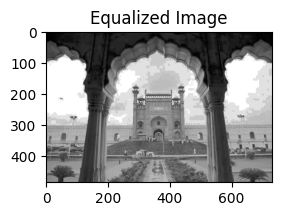

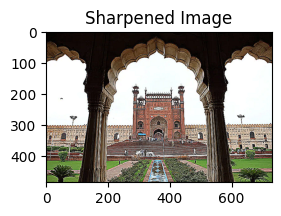

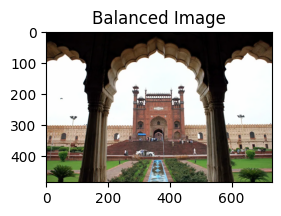

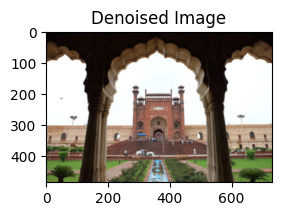

In [ ]:
# Q - 1

image = cv2.imread('se.jpg')

gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

equalized_image = cv2.equalizeHist(gray_img)


sharpening_kernel = np.array([[-1, -1, -1],
                               [-1, 9, -1],
                               [-1, -1, -1]])

sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)

cv2.imwrite('sharpened_image.jpg', sharpened_image)

wb = cv2.xphoto.createSimpleWB()

balanced_image = wb.balanceWhite(image)

cv2.imwrite('balanced_image.jpg', balanced_image)

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

cv2.imwrite('denoised_image.jpg', blurred_image)

plt.subplot(1, 2, 2)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.show()

plt.subplot(1, 2, 2)
plt.title('Sharpened Image')
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.show()

plt.subplot(1, 2, 2)
plt.title('Balanced Image')
plt.imshow(cv2.cvtColor(balanced_image, cv2.COLOR_BGR2RGB))
plt.show()

plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.show()

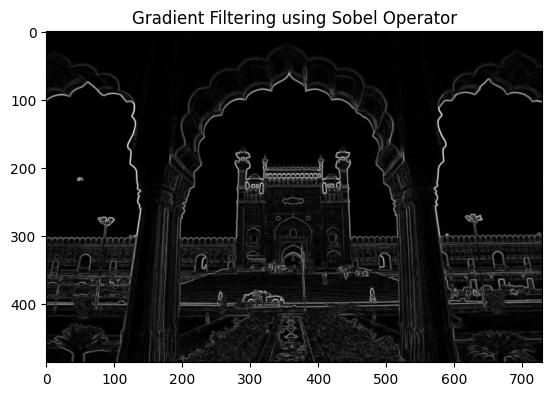

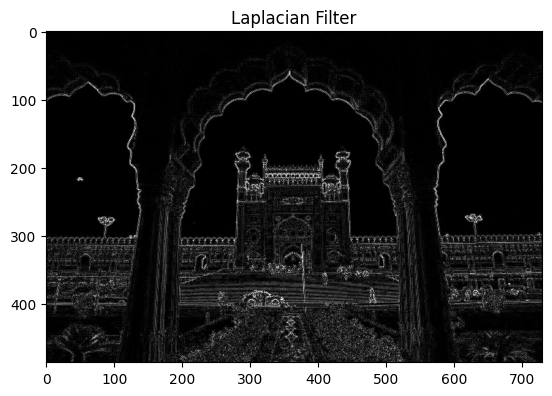

In [ ]:
# Q - 2

image = cv2.imread('se.jpg', cv2.IMREAD_GRAYSCALE)

grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

gradient_magnitude = cv2.magnitude(grad_x, grad_y)

gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

laplacian = cv2.Laplacian(image, cv2.CV_64F)

laplacian_abs = cv2.convertScaleAbs(laplacian)

plt.subplot(1, 1, 1)
plt.title('Gradient Filtering using Sobel Operator')
plt.imshow(cv2.cvtColor(gradient_magnitude, cv2.COLOR_BGR2RGB))
plt.show()

plt.subplot(1, 1, 1)
plt.title('Laplacian Filter')
plt.imshow(cv2.cvtColor(laplacian_abs, cv2.COLOR_BGR2RGB))
plt.show()

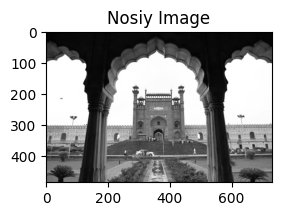

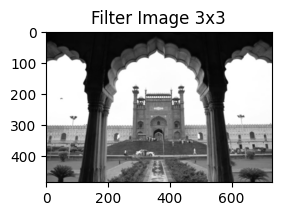

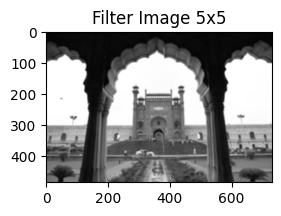

In [ ]:
# Q - 3

noisy_image = cv2.imread('se.jpg', cv2.IMREAD_GRAYSCALE)
filtered_image_3x3 = cv2.blur(noisy_image, (3, 3))
filtered_image_5x5 = cv2.blur(noisy_image, (5, 5))

plt.subplot(1, 2, 2)
plt.title('Nosiy Image')
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
plt.show()

plt.subplot(1, 2, 2)
plt.title('Filter Image 3x3')
plt.imshow(cv2.cvtColor(filtered_image_3x3, cv2.COLOR_BGR2RGB))
plt.show()

plt.subplot(1, 2, 2)
plt.title('Filter Image 5x5')
plt.imshow(cv2.cvtColor(filtered_image_5x5, cv2.COLOR_BGR2RGB))
plt.show()

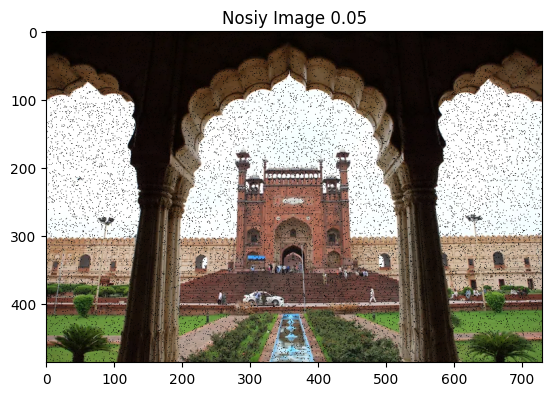

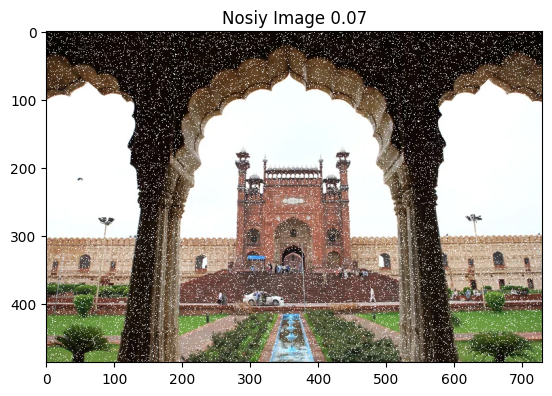

In [ ]:
# Q - 4

clean_image = cv2.imread('se.jpg')

density_1 = 0.05
density_2 = 0.07

height, width, channels = clean_image.shape

noisy_image_1 = clean_image.copy()
noisy_image_2 = clean_image.copy()

num_noisy_pixels_1 = int(density_1 * height * width)
num_noisy_pixels_2 = int(density_2 * height * width)

for _ in range(num_noisy_pixels_1):
    x, y = np.random.randint(0, width), np.random.randint(0, height)
    noisy_image_1[y, x] = [0, 0, 0]

for _ in range(num_noisy_pixels_2):
    x, y = np.random.randint(0, width), np.random.randint(0, height)
    noisy_image_2[y, x] = [255, 255, 255]

cv2.imwrite('noisy_image_0.05.jpg', noisy_image_1)
cv2.imwrite('noisy_image_0.07.jpg', noisy_image_2)

plt.subplot(1, 1, 1)
plt.title('Nosiy Image 0.05')
plt.imshow(cv2.cvtColor(noisy_image_1, cv2.COLOR_BGR2RGB))
plt.show()

plt.subplot(1, 1, 1)
plt.title('Nosiy Image 0.07')
plt.imshow(cv2.cvtColor(noisy_image_2, cv2.COLOR_BGR2RGB))
plt.show()

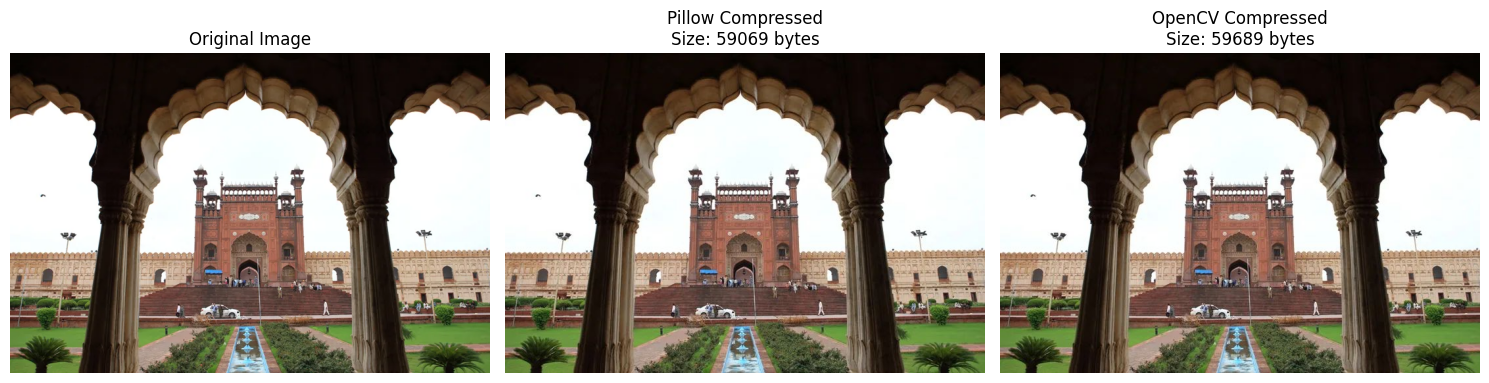

In [ ]:
# Q - 5

original_image_pillow = Image.open('se.jpg')
original_image_opencv = cv2.imread('se.jpg')

output_path_pillow = 'compressed_pillow.jpg'
output_path_opencv = 'compressed_opencv.jpg'

quality = 80
original_image_pillow.save(output_path_pillow, optimize=True, quality=quality)

compression_params = [cv2.IMWRITE_JPEG_QUALITY, quality]
cv2.imwrite(output_path_opencv, original_image_opencv, compression_params)

compressed_size_pillow = os.path.getsize(output_path_pillow)
compressed_size_opencv = os.path.getsize(output_path_opencv)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(original_image_pillow)
axes[0].set_title('Original Image')
axes[0].axis('off')

compressed_image_pillow = Image.open(output_path_pillow)
axes[1].imshow(compressed_image_pillow)
axes[1].set_title(f'Pillow Compressed\nSize: {compressed_size_pillow} bytes')
axes[1].axis('off')

compressed_image_opencv = cv2.imread(output_path_opencv)
axes[2].imshow(cv2.cvtColor(compressed_image_opencv, cv2.COLOR_BGR2RGB))
axes[2].set_title(f'OpenCV Compressed\nSize: {compressed_size_opencv} bytes')
axes[2].axis('off')

plt.tight_layout()
plt.show()

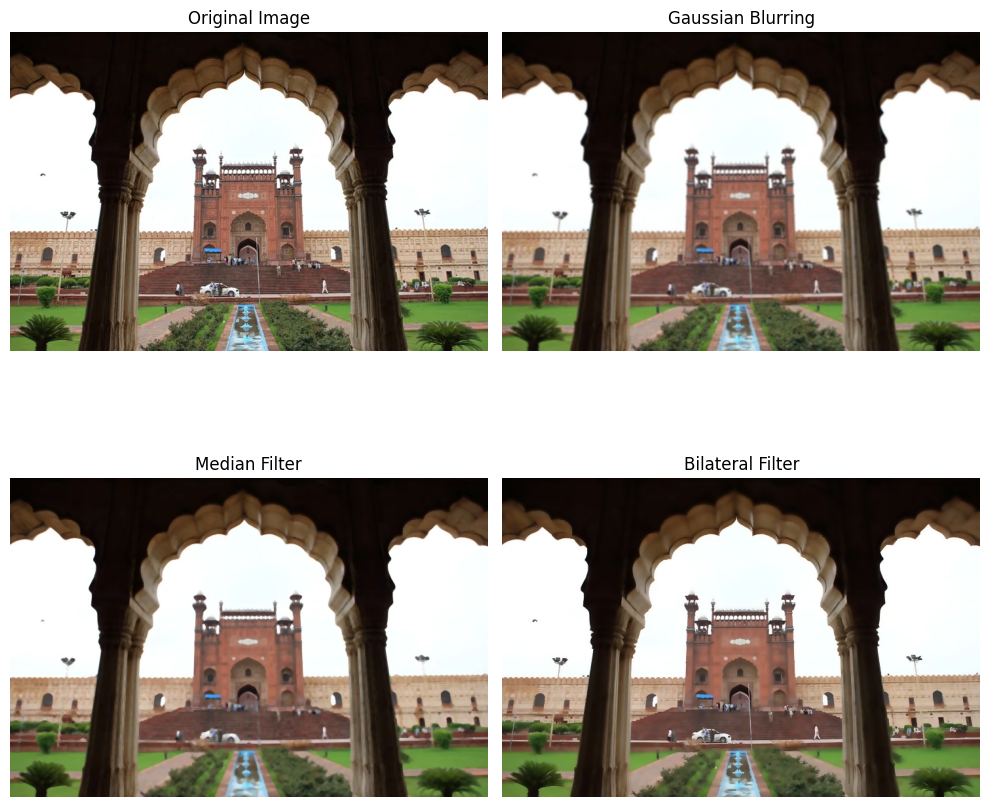

In [ ]:
# Q - 6
image = cv2.imread('se.jpg')

gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

median_filtered = cv2.medianBlur(image, 5)

bilateral_filtered = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Original image
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Gaussian Blurring
axes[0, 1].imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Gaussian Blurring')
axes[0, 1].axis('off')

# Median Filter
axes[1, 0].imshow(cv2.cvtColor(median_filtered, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Median Filter')
axes[1, 0].axis('off')

# Bilateral Filter
axes[1, 1].imshow(cv2.cvtColor(bilateral_filtered, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Bilateral Filter')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()